# Titanic
## Ejercicio final, anàlisis de un conjunto de datos. 

In [1]:
import pandas as pd

1. Descripción del conjunto de datos: número de observaciones, muestra los nombres de las  columnas. Muestra las 5 primeras filas
2. Mostrar la probabilidad de supervivencia según el sexo.
3. Cuantas clases había? Cual es la media de edad de cada clase? Mostrar la probabilidad de supervivencia por clase.
4. Crea una nueva columna de datos *Fam* que sea el resultado de sumar SibSp y Parch, con esto conoceremos el número de familiares que cada persona tenía en el barco. Elimina la columna PassengerId.
5. Crea una función que reciba una lista por parámetro y devuelva una nueva lista de valores *True* / *False*. *True* Si el valor recibido es mayor a 3, *False* en caso contrario. Probad vuestra función con la columna *Fam*. Cuantas personas tienen más de 3 familiares?
5. Rellenar las edades faltantes con la media de las edades. **Esta pregunta puntua doble si** rellenais las edades faltantes con la media de la clase de cada individuo. 
6. Con el resultado anterior dibuja un histograma de las edades del barco.
7. Cuales son los nombres de las 10 personas mas mayores? Cuantos menores de 18 años había en el barco? Cúal es la diferencia entre la persona mayor y la mas joven?
8. Cual es el precio medio de ticket (Fare) de los supervivientes, y de los no supervivientes?
9. Existe alguna relación entre la edad  y el número de familiares? Puedes evaluarlo mediante la aplicación de una regresión lineal? Muestra el gráfico y explica tus propias conclusiones.
10. Cread un json de las 10 primeras filas, guardadlo en un fichero llamado *resumen.json*


In [164]:
# punto 1
df = pd.read_csv("train.csv")
print("Número de observaciones:", df.shape[0])

print("Columnas:")
for col_name in df.columns:
    print(col_name)

df.head()

Número de observaciones: 891
Columnas:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
# punto 2
all_female = df[df['Sex'] == 'female']
female_survived = all_female[all_female['Survived'] == 1]
female_pr = female_survived.shape[0] / all_female.shape[0]
print("Probabilidad de sobrevivir para las mujeres:", female_pr)

all_male = df[df['Sex'] == 'male']
male_survived = all_male[all_male['Survived'] == 1]
male_pr = male_survived.shape[0] / all_male.shape[0]
print("Probabilidad de sobrevivir para los hombres:", male_pr)

Probabilidad de sobrevivir para las mujeres: 0.7420382165605095
Probabilidad de sobrevivir para los hombres: 0.18890814558058924


In [166]:
# Punto 3 Cuantas clases había? Cual es la media de edad de cada clase? Mostrar la probabilidad de supervivencia por clase.
df.head()
classes = df['Pclass'].unique()
N = classes.shape[0]
print("Clases:", N)

mean_i = list(range(0, N + 1))
for i in classes:
    class_i = df[df['Pclass'] == i]
    survived_i = class_i[class_i['Survived'] == 1]
    pr = survived_i.shape[0] / class_i.shape[0]
    mean_i[i] = round(class_i['Age'].mean(),2)
    
    print("Media de la clase", i, ":", mean_i[i], "Pr de sobrevivir", pr)

Clases: 3
Media de la clase 3 : 25.14 Pr de sobrevivir 0.24236252545824846
Media de la clase 1 : 38.23 Pr de sobrevivir 0.6296296296296297
Media de la clase 2 : 29.88 Pr de sobrevivir 0.47282608695652173


In [167]:
# Punto 4 Crea una nueva columna de datos Fam que sea el resultado de sumar SibSp y Parch, con esto conoceremos el número de familiares que cada persona tenía en el barco. Elimina la columna PassengerId.
df['Fam'] = df['SibSp'] + df['Parch']
df2 = df.drop('PassengerId', axis = 1) 
df2.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [168]:
# Punto 5 Crea una función que reciba una lista por parámetro y devuelva una nueva lista de valores True / False. True Si el valor recibido es mayor a 3, False en caso contrario. Probad vuestra función con la columna Fam. Cuantas personas tienen más de 3 familiares?

def isGreatherThanThree(pd_column):
    return pd_column > 3
    
results = isGreatherThanThree(df['Fam'])
print("Tienen mas de 3 familiares", results.value_counts()[True], "personas")

Tienen mas de 3 familiares 62 personas


In [178]:
# Punto 6 Rellenar las edades faltantes con la media de las edades. Esta pregunta puntua doble si rellenais las edades faltantes con la media de la clase de cada individuo.
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


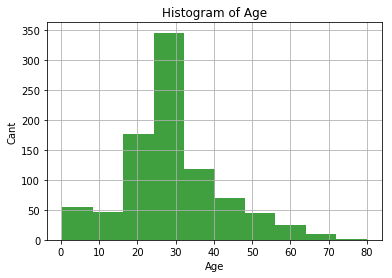

In [185]:
# Punto 7 Con el resultado anterior dibuja un histograma de las edades del barco.
import matplotlib.pyplot as plt

data = df['Age']

# the histogram of the data
n, bins, patches = plt.hist(data, facecolor='g', alpha=0.75)


plt.xlabel('Age')
plt.ylabel('Cant')
plt.title('Histogram of Age')
plt.grid(True)
plt.show()

In [231]:
# Punto 8 Cuales son los nombres de las 10 personas mas mayores? Cuantos menores de 18 años había en el barco? Cúal es la diferencia entre la persona mayor y la mas joven?

df.head()
data_sorted = df.sort_values('Age', ascending=False)
print(data_sorted['Name'].head(10))

menores = df[df['Age'] < 18]
print("Menores de 18:", menores.shape[0])

max_age = max(data_sorted['Age'])
min_age = min(data_sorted['Age'])
print("Diferencia", max_age - min_age)


630    Barkworth, Mr. Algernon Henry Wilson
851                     Svensson, Mr. Johan
96                Goldschmidt, Mr. George B
493                 Artagaveytia, Mr. Ramon
116                    Connors, Mr. Patrick
672             Mitchell, Mr. Henry Michael
745            Crosby, Capt. Edward Gifford
33                    Wheadon, Mr. Edward H
456               Millet, Mr. Francis Davis
54           Ostby, Mr. Engelhart Cornelius
Name: Name, dtype: object
Menores de 18: 113
Diferencia 79.58


In [240]:
# Punto 9 Cual es el precio medio de ticket (Fare) de los supervivientes, y de los no supervivientes?
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

survivors_ticket_media = survivors['Fare'].mean()
non_survivors_ticket_media = non_survivors['Fare'].mean()

print('Media de los sobrevivientes:', survivors_ticket_media)
print('Media de los no sobrevivientes:', non_survivors_ticket_media)


Media de los sobrevivientes: 48.39540760233917
Media de los no sobrevivientes: 22.117886885245877


In [ ]:
# Punto 10 Existe alguna relación entre la edad y el número de familiares? Puedes evaluarlo mediante la aplicación de una regresión lineal? Muestra el gráfico y explica tus propias conclusiones.


In [ ]:
# Punto 11 Cread un json de las 10 primeras filas, guardadlo en un fichero llamado resumen.json


El conjunto de datos se llama *train.csv*